<a href="https://colab.research.google.com/github/Beatrixwmh/Reproductive_Rights_Analysis/blob/main/ab2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An analysis of factors that contribute to opinions on legal reproductive rights
In this project, I will attempt to build a classification model that predicts a person's level of support for legal abortion based on certian personal attributes.
## Business Probelm
Planned Parenthood is looking to expand their customer base by actively advertising, both in-person and via social media, and would like to know where to focus their efforts in. This classification model helps them identify potential customers by weeding out those who are likely to be supportive of legal abortion, both directly via classification and indirectly via providing information about key attributes that makes one more likely to support the company.

#The Data
 The data was extracted from [The General Social Survey website](https://gss.norc.org/get-the-data/spss), specifically, data from a broad survey done in 2018 collecting a vast array of information about reposndents. The GSS uses full probability sampling and thus gathers data that is representative of the american population.

## Importing and inspecting data

The platform on which this project run is Google Colaboratory. All the code below can be found and run [here](https://colab.research.google.com/drive/17sWP3JexFAegoffSWVB3jqOd--Aetequ#scrollTo=YDXV6z9yV4su).

In [1]:
#import data
! wget https://gss.norc.org/Documents/spss/2018_spss.zip
! unzip 2018_spss.zip

--2023-07-31 22:09:45--  https://gss.norc.org/Documents/spss/2018_spss.zip
Resolving gss.norc.org (gss.norc.org)... 199.102.80.194
Connecting to gss.norc.org (gss.norc.org)|199.102.80.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1534358 (1.5M) [application/x-zip-compressed]
Saving to: ‘2018_spss.zip’

2018_spss.zip       100%[===================>]   1.46M  5.60MB/s    in 0.3s    

2023-07-31 22:09:45 (5.60 MB/s) - ‘2018_spss.zip’ saved [1534358/1534358]

Archive:  2018_spss.zip
  inflating: GSS2018.sav             


In [2]:
#read data
! pip install pyreadstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 10.0 MB/s eta 0:00:00


In [3]:
import pyreadstat

In [4]:
df, meta =pyreadstat.read_sav('GSS2018.sav')

In [5]:
df.head()

,ABANY,ABDEFECT,ABFELEGL,ABHELP1,ABHELP2,ABHELP3,ABHELP4,ABHLTH,ABINSPAY,ABMEDGOV1,...,XMARSEX,XMARSEX1,XMOVIE,XNORCSIZ,YEAR,YEARSJOB,YEARSUSA,YEARVAL,YOUSUP,ZODIAC
0,2.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,1.0,1.0,NaN,6.0,2018.0,1.0,NaN,NaN,45.0,6.0
1,1.0,1.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,NaN,...,1.0,NaN,2.0,6.0,2018.0,NaN,NaN,NaN,NaN,11.0
2,NaN,NaN,NaN,1.0,2.0,1.0,1.0,NaN,2.0,1.0,...,NaN,1.0,2.0,6.0,2018.0,15.0,NaN,NaN,3.0,1.0
3,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,...,NaN,NaN,2.0,6.0,2018.0,25.0,NaN,NaN,10.0,1.0
4,2.0,1.0,NaN,2.0,2.0,2.0,1.0,1.0,2.0,NaN,...,1.0,NaN,2.0,6.0,2018.0,NaN,NaN,NaN,NaN,4.0


In [6]:
#look at size of data
df.shape

(2348, 1065)

## Selecting features for modelling
There are 1065 survey questions for each respondent. However, there are also a lot of null values. To narrow my feature space down, I will select my features from only columns that have very few null values in order to minimize loss of information from imputing or dropping null rows.

In [7]:
#lowering column names for ease of use
df.columns= [w.lower() for w in df.columns]

In [8]:
#appned columns with <=35 null values
few_null= []
for col in df.columns:
  subset= df[col]
  if subset.isna().sum() <= 35:
    few_null.append(col)


In [9]:
print('There are {} columns with fewer than 35 null values'.format(len(few_null)))

There are 120 columns with fewer than 35 null values


In [10]:
few_null

['actssoc',
 'adminconsent',
 'adults',
 'age',
 'attend',
 'babies',
 'ballot',
 'bible',
 'born',
 'childs',
 'class',
 'cohort',
 'comprend',
 'consent',
 'coop',
 'dateintv',
 'degree',
 'dwelling',
 'dwellpre',
 'earnrs',
 'educ',
 'emoprobs',
 'ethnum',
 'famgen',
 'family16',
 'fatigue',
 'finalter',
 'finrela',
 'form',
 'formwt',
 'gender1',
 'god',
 'happy',
 'healthissp',
 'hefinfo',
 'hhrace',
 'hhtype',
 'hhtype1',
 'hispanic',
 'hlthmntl',
 'hlthphys',
 'hompop',
 'huadd',
 'id',
 'incuspop',
 'intage',
 'intethn',
 'intid',
 'intsex',
 'intyrs',
 'issp',
 'kidsinhh',
 'lngthinv',
 'marcohab',
 'marital',
 'mobile16',
 'mode',
 'neisafe',
 'othlang',
 'oversamp',
 'parborn',
 'partyid',
 'phase',
 'phone',
 'physacts',
 'pray',
 'pres16',
 'preteen',
 'quallife',
 'race',
 'racecen1',
 'ratepain',
 'reg16',
 'region',
 'relactiv',
 'relate1',
 'relhh1',
 'relhhd1',
 'relig',
 'relig16',
 'reliten',
 'relpersn',
 'res16',
 'respnum',
 'respond',
 'rfamlook',
 'rplace',
 'r

Next, I will look at the documentation to weed out features within these columns that might be contributing factors to political opinion. Moreover, I will select columns that reflect opinions about legal abortion, which are six hierarichal questions that make up the Rossi Scale. According to a research article written by Sarah K. Cowan and published by NORC at the University of Chicago, which is the same institution that conducted this survey, the Rossi Scale had proved to be a reliable scale to measure support for legal abortion. The article is called [Updating A Time-Series of Survey Questions: The Case
of Abortion Attitudes in the General Social Survey](https://gss.norc.org/Documents/reports/methodological-reports/MR133%20Abortion.pdf), and it discusses in depth the questions that are designed to capture people's stance regarding abortion as the debate and narrative surrounding the topic changes and evovles over time.

In [11]:
#features that might be relevant
features= ['relig','relig16','race','intage','childs','educ','pray','sex','marital','quallife','hispanic',
       'family16','born','partyid','wrkstat','satsoc','satfin']

In [12]:
#Rossi scale items
ab_cols= ['abdefect','abhlth','abpoor','abrape','absingle','abnomore']

In [13]:
#drop all null values
df= df[ab_cols+features].dropna()

In [14]:
df.shape

(1344, 23)

In [15]:
df.head()

,abdefect,abhlth,abpoor,abrape,absingle,abnomore,relig,relig16,race,intage,...,sex,marital,quallife,hispanic,family16,born,partyid,wrkstat,satsoc,satfin
0,1.0,1.0,2.0,1.0,2.0,2.0,11.0,1.0,1.0,68.0,...,1.0,5.0,3.0,1.0,1.0,1.0,5.0,3.0,3.0,3.0
1,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,62.0,...,2.0,4.0,1.0,1.0,1.0,1.0,2.0,5.0,2.0,2.0
4,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,68.0,...,1.0,3.0,2.0,1.0,1.0,1.0,6.0,5.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,62.0,...,2.0,2.0,4.0,1.0,1.0,1.0,2.0,5.0,4.0,2.0
6,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,46.0,...,2.0,3.0,3.0,1.0,5.0,1.0,0.0,1.0,3.0,2.0


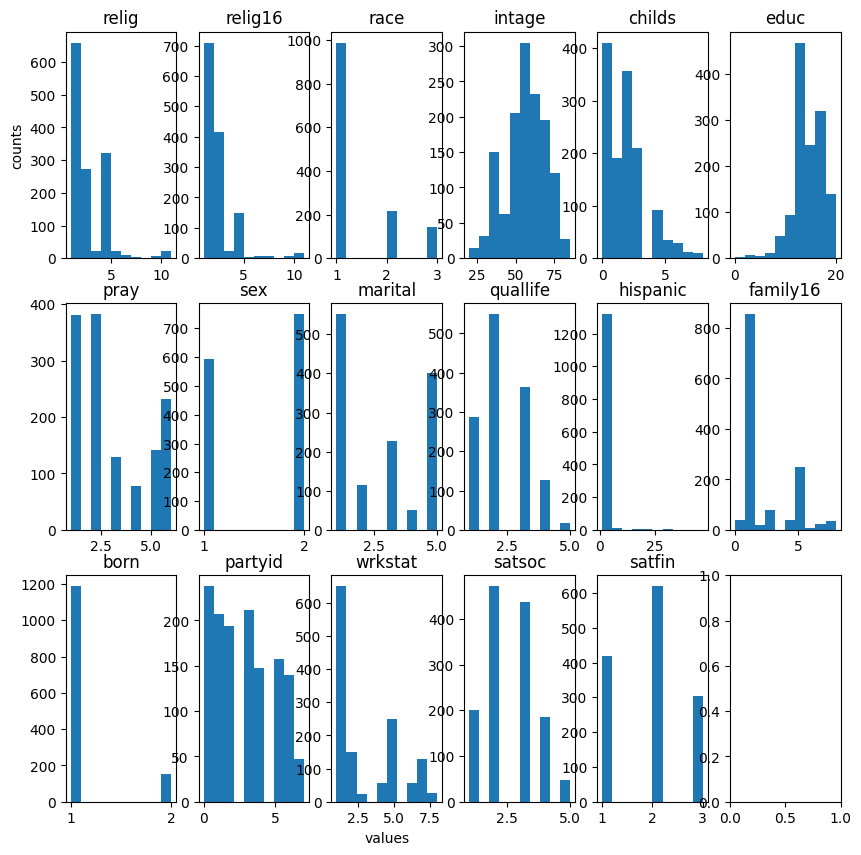

In [16]:
#look at distribution of features
import matplotlib.pyplot as plt
import numpy as np
fig, axs = plt.subplots(ncols=6, nrows=3, figsize=(10, 10))
for i, f in enumerate(features):
  row= i//6
  col= i%6
  axs[row,col].hist(df[f])
  axs[row,col].set_title(f)
  if row== 0 and col==0:
    axs[row,col].set_ylabel('counts')
  elif row == 2 and col==2:
    axs[row,col].set_xlabel('values')
plt.show()

In [17]:
df.describe()

,abdefect,abhlth,abpoor,abrape,absingle,abnomore,relig,relig16,race,intage,...,sex,marital,quallife,hispanic,family16,born,partyid,wrkstat,satsoc,satfin
count,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,...,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000
mean,1.218750,1.104167,1.485119,1.205357,1.516369,1.461310,2.277530,1.916667,1.369792,56.218006,...,1.557292,2.729911,2.285714,1.517113,2.238839,1.115327,2.813988,2.937500,2.559524,1.915179
std,0.413553,0.305590,0.499965,0.404113,0.499918,0.498686,1.793403,1.558649,0.665730,12.418225,...,0.496892,1.698617,0.947735,3.081616,1.994470,0.319536,2.097670,2.285105,1.018532,0.729309
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50.750000,...,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,56.000000,...,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000
75%,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,4.000000,2.000000,2.000000,66.000000,...,2.000000,5.000000,3.000000,1.000000,4.000000,1.000000,5.000000,5.000000,3.000000,2.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,11.000000,11.000000,3.000000,85.000000,...,2.000000,5.000000,5.000000,47.000000,8.000000,2.000000,7.000000,8.000000,5.000000,3.000000


Some of the values seem normally distributed, like age and life satisfaction, however, there are features that have very scewed distributions, like party identification and whether the respondent was born in the US. However, this is likely just a reflection of the general US population and is a direct consequnce of using random sampling.

## Data Preprocessing
### Abortion Opinions


For the entirety of the preprocessing stage, I will be encoding value names of each variable according to the [codebook](https://gss.norc.org/documents/codebook/gss_codebook.pdf) such that the variables make more intuitive sense and are easier for modeling. <br/>
I will first look at Rossi scale items to turn them into a  binary target variable.


In [18]:
df[ab_cols].describe()

,abdefect,abhlth,abpoor,abrape,absingle,abnomore
count,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000
mean,1.218750,1.104167,1.485119,1.205357,1.516369,1.461310
std,0.413553,0.305590,0.499965,0.404113,0.499918,0.498686
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
75%,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [19]:
encode= {1:1, 2:0}
for col in ab_cols:
  df[col]= df[col].map(encode)

In [20]:
df[ab_cols].head()

,abdefect,abhlth,abpoor,abrape,absingle,abnomore
0,1,1,0,1,0,0
1,1,1,0,1,1,1
4,1,1,0,0,0,0
5,1,1,1,1,1,1
6,1,1,1,1,0,1


Next, I will look at the distribution of the values to get more insight into the reason behind them.

In [21]:
#sort columns from most 0s to least 0s by index
import numpy as np
num_0=[]
for col in ab_cols:
  num_0.append(df[col].value_counts().loc[0.0])
sortedd= np.flip(np.argsort(num_0))

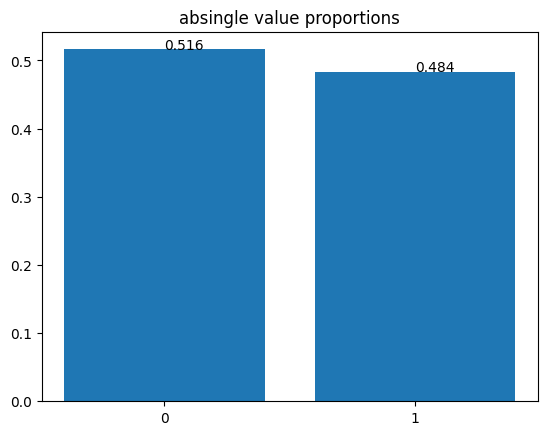

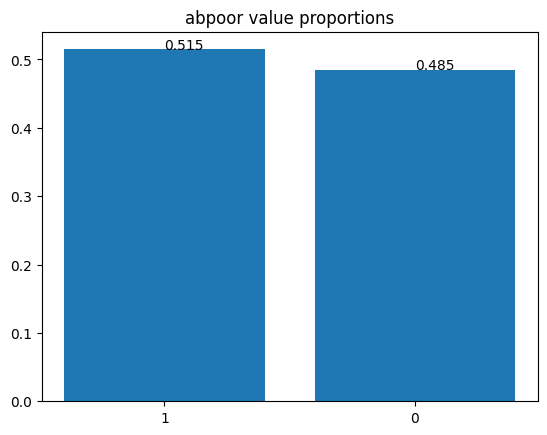

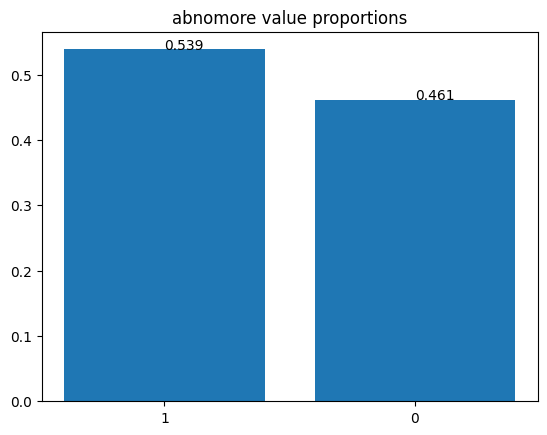

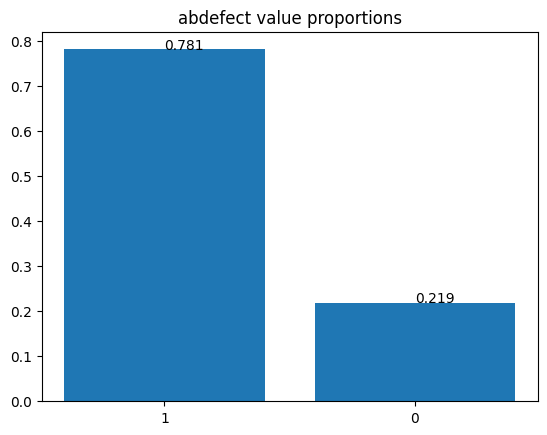

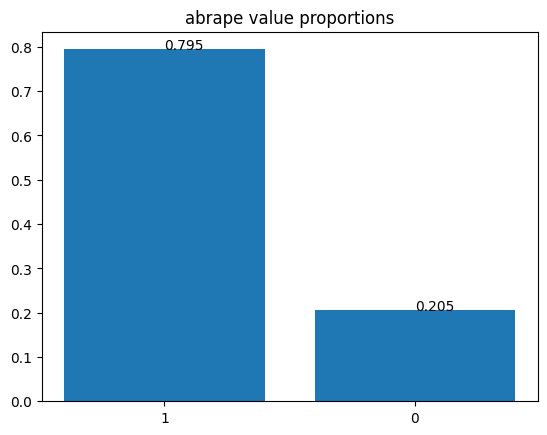

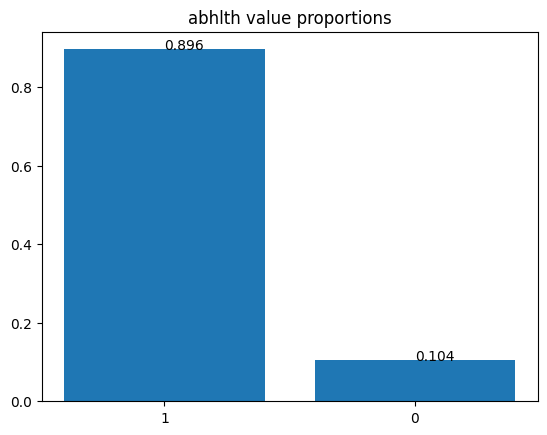

In [22]:
import matplotlib.pyplot as plt
#visualize distrubtuions (% of data)
for i in sortedd:
  col= ab_cols[i]
  valc = df[col].value_counts()
  x=list(valc.index)
  y= list(valc)/np.array(df[col].shape[0])
  plt.bar([0,1],y)
  plt.xticks([0,1], labels= x)
  plt.title(col+ ' value proportions')
  for index, value in enumerate(y):
    plt.text(index, value,str(round(value,3)))
  plt.show()


We can see that the questions are indeed in a hierichal order, and the yes to no ratio significantly increases with each question. <br/>
Moreover, the first three questions were more controversial, with the distribtuions being more evenly split, while the latter three have a significantly larger yes-to-no ratio. Next, I will combine these values into one column to form the Rossi Scale.

In [23]:

#combine ab_cols into rossi scale
series= df[ab_cols[0]]
for c in ab_cols[1:]:
  series+= df[c]

In [24]:
#turn series into dataframe
import pandas as pd
scale_df= pd.DataFrame(series)
scale_df.columns= ['Rossi scale']

In [25]:
#combine + drop origina ab_cols
data= pd.concat([df.drop(columns= list(ab_cols)), scale_df], axis=1)

In [26]:

data.head()

,relig,relig16,race,intage,childs,educ,pray,sex,marital,quallife,hispanic,family16,born,partyid,wrkstat,satsoc,satfin,Rossi scale
0,11.0,1.0,1.0,68.0,0.0,14.0,3.0,1.0,5.0,3.0,1.0,1.0,1.0,5.0,3.0,3.0,3.0,3
1,2.0,2.0,1.0,62.0,3.0,10.0,2.0,2.0,4.0,1.0,1.0,1.0,1.0,2.0,5.0,2.0,2.0,5
4,2.0,2.0,2.0,68.0,0.0,18.0,2.0,1.0,3.0,2.0,1.0,1.0,1.0,6.0,5.0,1.0,1.0,2
5,2.0,2.0,1.0,62.0,2.0,16.0,3.0,2.0,2.0,4.0,1.0,1.0,1.0,2.0,5.0,4.0,2.0,6
6,1.0,1.0,2.0,46.0,6.0,13.0,1.0,2.0,3.0,3.0,1.0,5.0,1.0,0.0,1.0,3.0,2.0,5


Lastly, since I am building a classification model, I will make a 'target' column, classifying those who score higher than 3 on the Rossi scale into the group that is in favor of abortion.

In [27]:
#Create target column where 1 indicates support (Rossi scale >=4) and 0 indicates lack of support
data['target']= data['Rossi scale'].apply(lambda x: 1 if x > 3 else 0)

Text(0.5, 1.0, 'Rossi scale distribution')

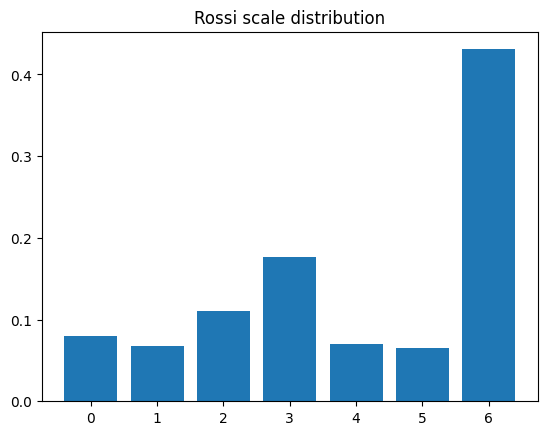

In [28]:
#Vizualise distributions of rossi scale and binary version respectively
ros_vc= data['Rossi scale'].value_counts()
plt.bar(ros_vc.index, ros_vc/ros_vc.sum())
plt.title('Rossi scale distribution')

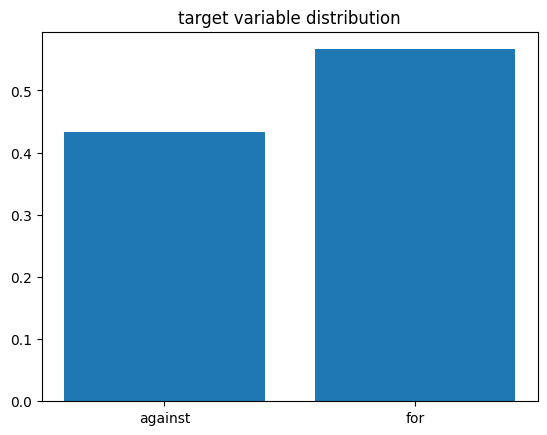

In [29]:
tar_vc= data.target.value_counts()
plt.bar(tar_vc.index, tar_vc/tar_vc.sum())
plt.xticks([0,1],labels= ['against','for'])
plt.title('target variable distribution')
plt.show()

It seems that there is a slight class imbalance with our dataset, with the majorty being those who are for legal abortion.

### Categorical Variables
Next, I will encode the independent variables one by one by referring the the codebook, renaming them into the category they represent based on the documentation and then turning them into dummy variables.

In [30]:
data.columns

Index(['relig', 'relig16', 'race', 'intage', 'childs', 'educ', 'pray', 'sex',
       'marital', 'quallife', 'hispanic', 'family16', 'born', 'partyid',
       'wrkstat', 'satsoc', 'satfin', 'Rossi scale', 'target'],
      dtype='object')

In [31]:
#pray
data.pray.value_counts()

2.0    382
1.0    381
6.0    232
5.0    142
3.0    130
4.0     77
Name: pray, dtype: int64

In [32]:
data.pray= data.pray.map({6:0,5:1,4:2,3:3,2:4,1:5})

In [33]:
# work status
data.wrkstat.value_counts()

1.0    651
5.0    251
2.0    151
7.0    128
4.0     57
6.0     56
8.0     26
3.0     24
Name: wrkstat, dtype: int64

In [34]:
data.wrkstat= data.wrkstat.map({1:'full_time',2:'prt_time',3:'temp_break',4:'unemp',5:'retired',6:'student',
                                7:'stay_home',8:'other'})

In [35]:
#partyid
data.partyid.value_counts()

0.0    238
3.0    212
1.0    207
2.0    194
5.0    158
4.0    148
6.0    140
7.0     47
Name: partyid, dtype: int64

In [36]:
#satfin
data.satfin= data.satfin.map({3:1,2:2,1:3})

In [37]:
#satsoc and quallife
vals= sorted(data.satsoc.value_counts().index)
mapper= dict(zip(vals,np.flip(vals)))
data.satsoc=data.satsoc.map(mapper)
data.quallife=data.quallife.map(mapper)

It looks like it is encoded on a scale on which 0 is 'Strong Democrat' and 6 is 'Strong Republican'. Since 7 is 'other party', which does not belong on this scale, I will drop those rows.

In [38]:
#drop 'other party
data.drop(data[data.partyid == 7].index, inplace= True)

In [39]:
#religion
data['relig'].value_counts()

1.0     641
4.0     310
2.0     265
3.0      22
5.0      19
11.0     15
6.0      10
9.0       6
10.0      5
7.0       4
Name: relig, dtype: int64

In [40]:
data['relig16'].value_counts()

1.0     688
2.0     401
4.0     142
3.0      23
10.0     10
11.0      8
9.0       7
6.0       7
7.0       6
5.0       5
Name: relig16, dtype: int64

In [41]:
relig_map={1:'prot',2:'cath',3:'jew',4:'athiest',5:'other',6:'bud',7:'hind',9:'mus/isl',10:'orth-chr',11:'chr'}
data['relig'] = data['relig'].map(relig_map)
data['relig16']= data['relig16'].map(relig_map)

In [42]:
#race
data.race= data.race.map({1: 'white',2:'black',3:'other'})

In [43]:
#hispanic
data.hispanic.value_counts()

1.0     1106
2.0      135
3.0       21
4.0        9
30.0       6
6.0        5
15.0       3
22.0       2
5.0        2
11.0       2
9.0        1
21.0       1
8.0        1
10.0       1
47.0       1
41.0       1
Name: hispanic, dtype: int64

In [44]:
hisp_map= {1:'mex',2:'chica',3:'cub'}|dict(zip([x for x in range(4,48)],['other' for x in range(4,48)]))
data.hispanic= data.hispanic.map(hisp_map)

In [45]:
#sex
data.sex.value_counts()

2.0    729
1.0    568
Name: sex, dtype: int64

In [46]:
data.sex= data.sex.map({1:'male',2:'female'})

In [47]:
#born (1 if born in the US, 0 if not)
data.born = data.born.map({1:1,2:0})

In [48]:
#marital
data.marital.value_counts()

1.0    530
5.0    383
3.0    222
2.0    111
4.0     51
Name: marital, dtype: int64

In [49]:
data.marital = data.marital.map({1.0:'mar',5.0:'sing',3.0:'div',2.0:'wid',4.0:'sep'})

In [50]:
#family16
data.family16.value_counts()

1.0    821
5.0    243
3.0     77
0.0     39
4.0     37
8.0     33
7.0     24
2.0     17
6.0      6
Name: family16, dtype: int64

In [51]:
data.family16= data.family16.map({1:'both_par',2:'step_par',3:'step_par',4:'sing_par',5:'sing_par',
                                  6:'rel',7:'rel',8:'rel'})

In [52]:
data.head()

,relig,relig16,race,intage,childs,educ,pray,sex,marital,quallife,hispanic,family16,born,partyid,wrkstat,satsoc,satfin,Rossi scale,target
0,chr,prot,white,68.0,0.0,14.0,3,male,sing,3.0,mex,both_par,1,5.0,temp_break,3.0,1,3,0
1,cath,cath,white,62.0,3.0,10.0,4,female,sep,5.0,mex,both_par,1,2.0,retired,4.0,2,5,1
4,cath,cath,black,68.0,0.0,18.0,4,male,div,4.0,mex,both_par,1,6.0,retired,5.0,3,2,0
5,cath,cath,white,62.0,2.0,16.0,3,female,wid,2.0,mex,both_par,1,2.0,retired,2.0,2,6,1
6,prot,prot,black,46.0,6.0,13.0,5,female,div,3.0,mex,sing_par,1,0.0,full_time,3.0,2,5,1


In [53]:
data.shape

(1297, 19)

Now that all my variables are encoded properly, I will create dummy variables for my categorical columns.

In [55]:
cat_cols= ['relig','relig16','race','sex','marital','hispanic','family16']
num_cols=['intage','childs','educ','quallife','born','partyid','pray','satsoc','satfin']

In [56]:
#add dummy columns to create features_df
features_df= pd.concat([data[num_cols],pd.get_dummies(data[cat_cols], drop_first= True)], axis=1)
features_df.head()

,intage,childs,educ,quallife,born,partyid,pray,satsoc,satfin,relig_bud,...,marital_mar,marital_sep,marital_sing,marital_wid,hispanic_cub,hispanic_mex,hispanic_other,family16_rel,family16_sing_par,family16_step_par
0,68.0,0.0,14.0,3.0,1,5.0,3,3.0,1,0,...,0,0,1,0,0,1,0,0,0,0
1,62.0,3.0,10.0,5.0,1,2.0,4,4.0,2,0,...,0,1,0,0,0,1,0,0,0,0
4,68.0,0.0,18.0,4.0,1,6.0,4,5.0,3,0,...,0,0,0,0,0,1,0,0,0,0
5,62.0,2.0,16.0,2.0,1,2.0,3,2.0,2,0,...,0,0,0,1,0,1,0,0,0,0
6,46.0,6.0,13.0,3.0,1,0.0,5,3.0,2,0,...,0,0,0,0,0,1,0,0,1,0


Finally, I will seperate out a train, test, and validation set in preparation for modeling.

In [57]:
#seperate out train, test, and validation set
from sklearn.model_selection import train_test_split
X= features_df
y=data['target']
X_sub, X_test, y_sub, y_test = train_test_split(X,y,test_size= 0.15, random_state=13)
X_train,X_val, y_train,y_val= train_test_split(X_sub,y_sub, test_size=0.1, random_state=13)

## Modelling
### Baseline Model- Decision Trees
I will now move on to modelling. First, I will build a baseline model using decision trees and its default parameters.

In [58]:
#check class imbalance in training set|
y_train.value_counts()/ y_train.shape[0]

1    0.551968
0    0.448032
Name: target, dtype: float64

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
baseline= DecisionTreeClassifier()
#cross validate
cross_val_score(baseline, X_train,y_train).mean()

0.6276432668392466

In [60]:
#look at train and test accuracy
baseline.fit(X_train, y_train)
print('Baseline train accuracy : {}, \nTest accuracy: {}'.format(baseline.score(X_train,y_train), baseline.score(X_test,y_test)))

Baseline train accuracy : 1.0, 
Test accuracy: 0.5641025641025641


The accuracy score from cross validation is only slightly better than random guessing. Moreover, it is obviously overfitting to the training set. Next, I will try using other classifcation models like KNN, ensemble classifiers, and logistic regression.

In [61]:
#import libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [62]:
#instantiate models/pipelines
gb= GradientBoostingClassifier(random_state=13)
rf= RandomForestClassifier(random_state=13)
lr_pipe= Pipeline([('scaler_r', StandardScaler()),('lr',LogisticRegression(random_state=13))])
knn_pipe= Pipeline([('scaler_knn', StandardScaler()), ('knn', KNeighborsClassifier())])

In [63]:
#cross validate all
scores=[]
models= [gb, knn_pipe, lr_pipe, rf]
for model in models:
  score= cross_val_score(model, X_train, y_train).mean()
  scores.append(score)
  scores.sort()
  print('cross val score for {}:'.format(model),score)
print('The best models are {} and {}, with scores of {} and {} resptectively'.format(models[np.argmax(scores)],
                                                                                     models[np.argmax(scores[1:])],max(scores),
                                                                                            scores[1]))

cross val score for GradientBoostingClassifier(random_state=13): 0.6367087965077916
cross val score for Pipeline(steps=[('scaler_knn', StandardScaler()),
                ('knn', KNeighborsClassifier())]): 0.6196335211410589
cross val score for Pipeline(steps=[('scaler_r', StandardScaler()),
                ('lr', LogisticRegression(random_state=13))]): 0.6790975077407239
cross val score for RandomForestClassifier(random_state=13): 0.65685498198061
The best models are RandomForestClassifier(random_state=13) and Pipeline(steps=[('scaler_r', StandardScaler()),
                ('lr', LogisticRegression(random_state=13))]), with scores of 0.6790975077407239 and 0.6367087965077916 resptectively


While all of them seemed to perform better than my baseline model, random forest and logistic regression produced the best accuracy. Next, I will look further into random forest, then try to tune this model to see if it would yield better results.

### Model Tuning with GridSearchCV
To get a good idea of what parameters to try, I will first look at the confusion matrices of my baseline model to evaluate it.

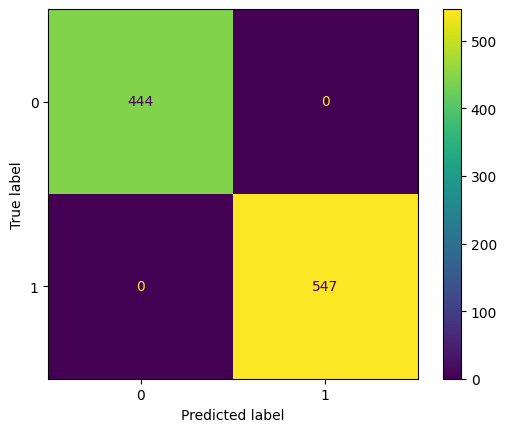

accuracy score: 1.0


In [64]:
#look at confusion matrix of training data
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
rf.fit(X_train,y_train)
cm_train= confusion_matrix(y_train, rf.predict(X_train))
disp_train= ConfusionMatrixDisplay(cm_train, display_labels= rf.classes_)
disp_train.plot()
plt.show()
print('accuracy score:' ,rf.score(X_train,y_train))

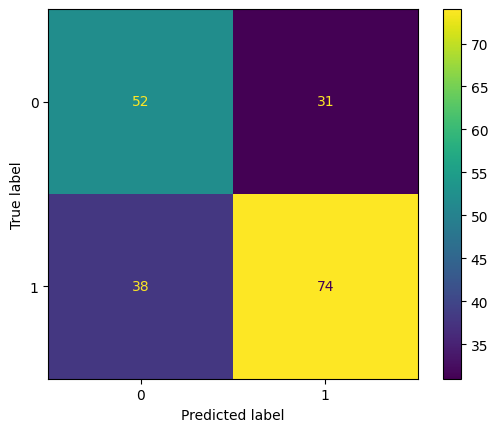

accuracy score: 0.6461538461538462


In [79]:
#look at confusion matrix on test set
cm_test= confusion_matrix(y_test, rf.predict(X_test))
disp_test= ConfusionMatrixDisplay(cm_test, display_labels= rf.classes_)
disp_test.plot()
plt.show()
print('accuracy score:', rf.score(X_test,y_test))

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.58      0.63      0.60        83
           1       0.70      0.66      0.68       112

    accuracy                           0.65       195
   macro avg       0.64      0.64      0.64       195
weighted avg       0.65      0.65      0.65       195



This model still seems to be overfitting the the training set. I will try different parameters that aim to reduce overfitting for my gridsearh.

In [81]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
rf_tune= RandomForestClassifier(random_state=13)
parameters = {'n_estimators': [70,100,200],
              'criterion': ['gini','entropy','log_loss'],
              'max_depth': [5,10, None],
              'max_features': ['sqrt','log2']}
rf_cv = GridSearchCV(rf_tune, parameters, cv=3,n_jobs=-1)
rf_cv.fit(X_train,y_train)
print(f'Train score: {rf_cv.score(X_train,y_train)}')
print(f'Test score:  {rf_cv.score(X_test,y_test)}')


Train score: 0.9465186680121089
Test score:  0.6461538461538462


In [82]:
rf_cv.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'log2',
 'n_estimators': 100}

In [83]:
rf_tuned= RandomForestClassifier( max_features='log2',max_depth=10,random_state=13)
rf_tuned.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features='log2', random_state=13)

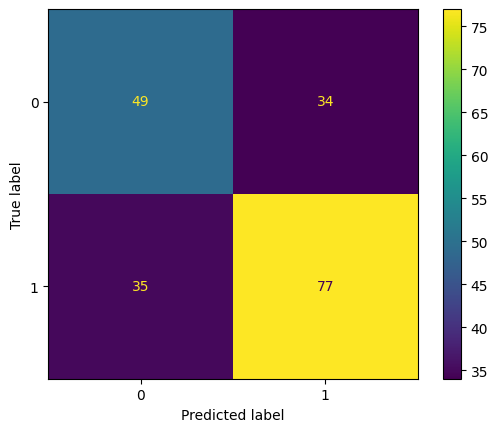

              precision    recall  f1-score   support

           0       0.58      0.59      0.59        83
           1       0.69      0.69      0.69       112

    accuracy                           0.65       195
   macro avg       0.64      0.64      0.64       195
weighted avg       0.65      0.65      0.65       195



In [84]:
#look at confusion matrix on test set
cm_test= confusion_matrix(y_test, rf_tuned.predict(X_test))
disp_test= ConfusionMatrixDisplay(cm_test, display_labels= rf_tuned.classes_)
disp_test.plot()
plt.show()
print(classification_report(y_test, rf_tuned.predict(X_test)))

These metrics are very close to that of the previous model. However, this one has better recall for positive cases, which is what I am trying to optimize for, so I will keep this model. <br/> Moreover, it still has low precision and recall in negative cases, and the overall metric is worse. I will now try to oversample negative cases to see if it will be better able to classify them correctly.  <br/>



In [85]:
rf_sm= RandomForestClassifier(max_features='log2', max_depth=10,random_state=13)

In [86]:
from imblearn.over_sampling import SMOTE
sm= SMOTE(random_state=13)
X_sm_train, y_sm_train= sm.fit_resample(X_train, y_train)
rf_sm.fit(X_sm_train, y_sm_train)

RandomForestClassifier(max_depth=10, max_features='log2', random_state=13)

In [87]:
#check value counts
y_sm_train.value_counts()

0    547
1    547
Name: target, dtype: int64

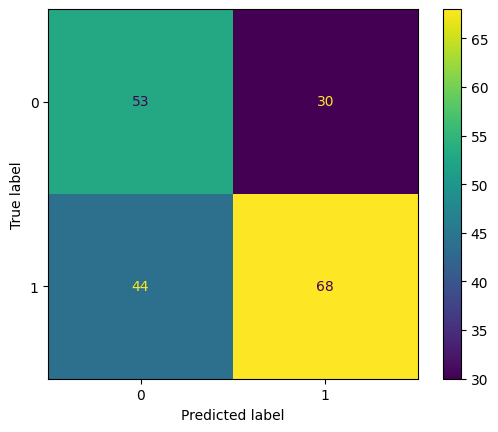

train score: 0.9404641775983855
test score : 0.6205128205128205


In [88]:
#look at confusion matrix on test set
cm_test= confusion_matrix(y_test, rf_sm.predict(X_test))
disp_test= ConfusionMatrixDisplay(cm_test, display_labels= rf_sm.classes_)
disp_test.plot()
plt.show()
print('train score:',rf_sm.score(X_train,y_train))
print('test score :' ,rf_sm.score(X_test,y_test))

In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_sm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.55      0.64      0.59        83
           1       0.69      0.61      0.65       112

    accuracy                           0.62       195
   macro avg       0.62      0.62      0.62       195
weighted avg       0.63      0.62      0.62       195



This did not help . I will iterate on the random forest model with tuned parameters from here.

In [90]:
rf2= RandomForestClassifier(max_depth=10, max_features='log2',random_state=13)

### Feature Engineering
Next, I will look into adding features that might be useful. I will be looking at highly correlated variables and add columns that capture outliers. I will also try to reduce the complexity and noise of the feature space by dropping or combining certain columns if they have a high correlation. <br/>
To begin with, I will look through the correlation matrix and append any column that has a correlation with other independent variables of >=0.3.

In [91]:
#look at columns with correlation to other columns that is larger than 0.3
cor = (np.abs(X_train.corr()) >= 0.3).sum()
cor_cols=[]
for i,x in enumerate(cor):
  if x>1:
    cor_cols.append(cor.index[i])

In [92]:
cor_cols

['childs',
 'quallife',
 'born',
 'pray',
 'satsoc',
 'satfin',
 'relig_cath',
 'relig_hind',
 'relig_jew',
 'relig_mus/isl',
 'relig_orth-chr',
 'relig_prot',
 'relig16_cath',
 'relig16_hind',
 'relig16_jew',
 'relig16_mus/isl',
 'relig16_orth-chr',
 'relig16_prot',
 'race_other',
 'race_white',
 'marital_mar',
 'marital_sing',
 'hispanic_cub',
 'hispanic_mex',
 'hispanic_other']

Next, I will create a dictionary that shows the two correlated columns, and the degree of correlation between them.

In [93]:
#dictionary that shows the correlation between selected columns
from itertools import combinations
cor_dic= {}
for col1, col2 in combinations(cor_cols,2):
  cor=  X_train[col1].corr(X_train[col2])
  if np.abs(cor) >= 0.3:
    cor_dic[(col1,col2)] = cor


In [94]:
cor_dic

{('childs', 'marital_sing'): -0.4219952352063608,
 ('quallife', 'satsoc'): 0.5276880428735627,
 ('quallife', 'satfin'): 0.41860615003527873,
 ('born', 'race_other'): -0.34907241751000356,
 ('born', 'hispanic_mex'): 0.38450659343721894,
 ('pray', 'relig_prot'): 0.40466017445284286,
 ('satsoc', 'satfin'): 0.30371960470206777,
 ('relig_cath', 'relig_prot'): -0.49728565691192944,
 ('relig_cath', 'relig16_cath'): 0.6707040026961549,
 ('relig_cath', 'relig16_prot'): -0.49706194389143094,
 ('relig_hind', 'relig16_hind'): 0.8160836875607764,
 ('relig_jew', 'relig16_jew'): 0.7458974358974357,
 ('relig_mus/isl', 'relig16_mus/isl'): 0.7288147534422833,
 ('relig_orth-chr', 'relig16_orth-chr'): 0.4692547131809318,
 ('relig_prot', 'relig16_cath'): -0.468767417503166,
 ('relig_prot', 'relig16_prot'): 0.6090823966128598,
 ('relig16_cath', 'relig16_prot'): -0.7210183089950625,
 ('relig16_cath', 'hispanic_mex'): -0.3543937206375894,
 ('race_other', 'race_white'): -0.5485255358640104,
 ('race_other', 'hi

As expected, the highest correlations are between the religion one was raised in, and the relgion one is in currently. To draw attention to outliers, I will add three columns, one that indicates when a given respondent had changed relgions, the second indicating they became athiest, and the third indicating if they became religious.

In [95]:
# series 'changed_rel' that indicates when relig16 and relig are not the same
rel= cor_cols[6:12]
rel16= cor_cols[12:-7]
changed_rel= np.array([0 for x in range(X_train.shape[0])])
for re, re16 in list(zip(rel,rel16)):
  subset= X_train[re] + X_train[re16]
  changed_rel+= subset.apply(lambda x: 1 if x==1 else 0)

In [96]:
changed_rel.value_counts()

0    703
1    228
2     60
dtype: int64

I now end up with a series in which 2 indicates the respondent went from one relgion to another, and 1 indicates either they've become athiest, or was athiest and became religious. I will make an intermdiate series to indicate that.

In [97]:
#seperate out became religious and became athiest
ind= changed_rel[changed_rel==1].index
series= np.array([0 for x in range(X_train.shape[0])])
for re in rel16:
  series += X_train[re]
bec_rel_ind= series.loc[ind][series.loc[ind]==0].index
bec_rel= series.map({1:0,0:0,2:0})
bec_rel[bec_rel_ind]= 1

Now I will map the values to their corresponding columns.

In [98]:
# value= 1 means they became athiest, value= 2 means they changed religions
X_train_new= X_train.copy()
X_train_new['changed_relig']= changed_rel.map({1:0,2:1,0:0})
X_train_new['bec_relig']= bec_rel
X_train_new['bec_ath'] = changed_rel.map({1:1,2:0,0:0})*bec_rel.map({1:0,0:1})

Next, I will replace the rel16 and rel columns with columns that indicate thet have stuck with the religion, and columns indicating what relgion they changed into if any.

In [99]:
#divide religion into more specific categories
for re16 in rel16:
  X_train_new[re16+'_to_pres']= X_train_new[re16]*changed_rel.map({0:1,2:0,1:0})
  X_train_new['is_now_'+re]= X_train_new[re]*X_train_new.changed_relig
X_train_new.drop(rel+rel16,axis=1,inplace=True)

To speed up the process of transforming other datasets, I will create a function that does everything mentioned above.

In [100]:
def relig_cols_transform(x_df, new_df):
  '''
  a function that takes in original features dataset and a copy of it,
  and returns a dataframe with transformed
  religious columns, and with 'bec_relig', 'bec_ath', and 'changed_relig' columns added.
  '''
  changed_rel= np.array([0 for x in range(x_df.shape[0])])
  for re, re16 in list(zip(rel,rel16)):
    subset= x_df[re] + x_df[re16]
    changed_rel+= subset.apply(lambda x: 1 if x==1 else 0)
  ind= changed_rel[changed_rel==1].index
  series= np.array([0 for x in range(x_df.shape[0])])
  for re in rel16:
      series += x_df[re]
  bec_rel_ind= series.loc[ind][series.loc[ind]==0].index
  bec_rel= series.map({1:0,0:0,2:0})
  bec_rel[bec_rel_ind]= 1
  new_df['changed_relig']= changed_rel.map({1:0,2:1,0:0})
  new_df['bec_relig']= bec_rel
  new_df['bec_ath'] = changed_rel.map({1:1,2:0,0:0})*bec_rel.map({1:0,0:1})
  for re16 in rel16:
    new_df[re16+'_to_pres']= x_df[re16]*changed_rel.map({0:1,2:0,1:0})
    new_df['is_now_'+re]= x_df[re]*new_df.changed_relig
  new_df.drop(rel+rel16,axis=1,inplace=True)
  return new_df




I also noticed there is a strong negative correlation between being single and having kids, so I will add a column that captures instances of single parents

In [101]:
#add column indicating they're a single parent
X_train_new['single_par']=(X_train.marital_sing * X_train.childs).apply(lambda x: 1 if x>0 else 0)

Now I will add a column that captures respondents that are a minority race but born in the US, since 'born' and 'race_other' have a moderate negative correlation.

In [102]:
#add column that indicates they're born in the US as a racial minority (not black or white)
X_train_new['born_min']= X_train.born * X_train.race_other

On a simialr note, I will capture hispanics who were not born in the US.

In [103]:
#hispanics that were not born in the US
hisp_cols= cor_cols[-3:]
is_hisp= X_train[hisp_cols[0]]+ X_train[hisp_cols[1]]+ X_train[hisp_cols[2]]
X_train_new['frgn_hisp']= X_train['born']*is_hisp

Finally, since financial satisfaction and social satisfaction are both storngly related to quality of life, I will combine the three columns to simplify the feature space.

In [104]:
#combine satfin and satsoc and quallife
X_train_new['overall_sat']= (X_train['satfin']+X_train['satsoc'])*X_train['quallife']
X_train_new.drop(['satfin','satsoc','quallife'],axis=1,inplace=True)

In [105]:
#score with original features
cross_val_score(rf2, X_train,y_train).mean()

0.6528551850159892

In [106]:
#score with new features
cross_val_score(rf2, X_train_new, y_train).mean()

0.6659864981473022

This cross validation score seems to be an improvement, I will now try these new features on the test set.

In [107]:
#try on test set
rf2.fit(X_train_new, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', random_state=13)

In [108]:
#transform X_test
X_test_new= relig_cols_transform(X_test,X_test.copy())

In [109]:
X_test_new['single_par']=(X_test.marital_sing * X_test.childs).apply(lambda x: 1 if x>0 else 0)

In [110]:
X_test_new['born_min']= X_test.born * X_test.race_other

In [111]:
#hispanics that were not born in the US
hisp_cols= cor_cols[-3:]
is_hisp= X_test[hisp_cols[0]]+ X_test[hisp_cols[1]]+ X_test[hisp_cols[2]]
X_test_new['frgn_hisp']= X_test['born']*is_hisp

In [112]:
#combine satfin and satsoc
X_test_new['overall_sat']= (X_test['satfin']+X_test['satsoc'])*X_test.quallife
X_test_new.drop(['satfin','satsoc','quallife'],axis=1,inplace=True)

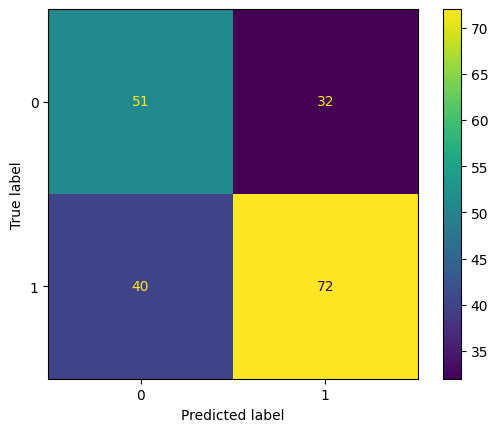

              precision    recall  f1-score   support

           0       0.56      0.61      0.59        83
           1       0.69      0.64      0.67       112

    accuracy                           0.63       195
   macro avg       0.63      0.63      0.63       195
weighted avg       0.64      0.63      0.63       195



In [113]:
#look at confusion matrix on test set
cm_test= confusion_matrix(y_test, rf2.predict(X_test_new))
disp_test= ConfusionMatrixDisplay(cm_test, display_labels= rf2.classes_)
disp_test.plot()
plt.show()
print(classification_report(y_test, rf2.predict(X_test_new)))

The results are slightly worse on the test set, however, the improved cross validation score was promising. Moreover, the engineered features provide more concise and specific information. I will use the validation set as a tie breaker.

In [114]:
#transform X_val
X_val_new= relig_cols_transform(X_val, X_val.copy())

In [115]:
#single parents
X_val_new['single_par']=(X_val.marital_sing * X_val.childs).apply(lambda x: 1 if x>0 else 0)

In [116]:
#born minority race
X_val_new['born_min']= X_val.born * X_val.race_other

In [117]:
#hispanics that were not born in the US
hisp_cols= cor_cols[-3:]
is_hisp= X_val[hisp_cols[0]]+ X_val[hisp_cols[1]]+ X_val[hisp_cols[2]]
X_val_new['frgn_hisp']= X_val['born']*is_hisp

In [118]:
#combine satfin and satsoc
X_val_new['overall_sat']= (X_val['satfin']+X_val['satsoc'])*X_val.quallife
X_val_new.drop(['satfin','satsoc','quallife'],axis=1,inplace=True)

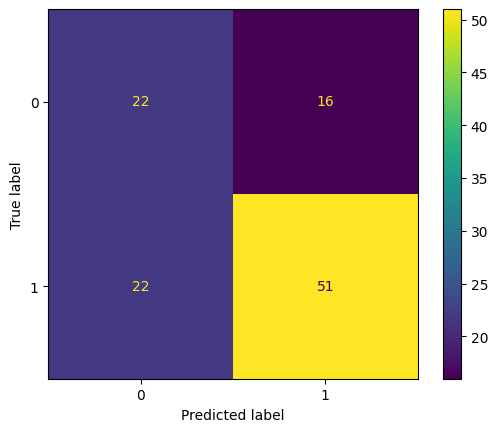

              precision    recall  f1-score   support

           0       0.50      0.58      0.54        38
           1       0.76      0.70      0.73        73

    accuracy                           0.66       111
   macro avg       0.63      0.64      0.63       111
weighted avg       0.67      0.66      0.66       111



In [119]:
#look at confusion matrix on original val
cm_val= confusion_matrix(y_val, rf_tuned.predict(X_val))
disp_val= ConfusionMatrixDisplay(cm_val, display_labels= rf2.classes_)
disp_val.plot()
plt.show()
print(classification_report(y_val, rf_tuned.predict(X_val)))

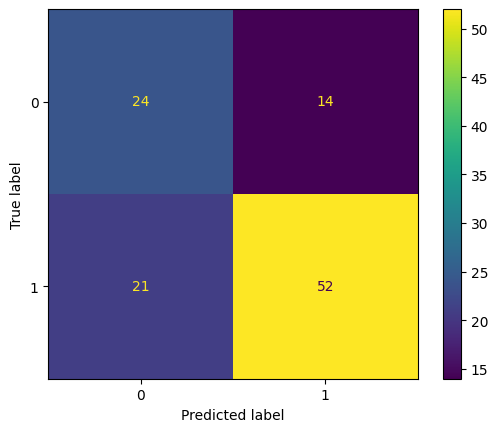

              precision    recall  f1-score   support

           0       0.53      0.63      0.58        38
           1       0.79      0.71      0.75        73

    accuracy                           0.68       111
   macro avg       0.66      0.67      0.66       111
weighted avg       0.70      0.68      0.69       111



In [120]:
#look at confusion matrix on new val set
cm_val= confusion_matrix(y_val, rf2.predict(X_val_new))
disp_test= ConfusionMatrixDisplay(cm_val, display_labels= rf2.classes_)
disp_test.plot()
plt.show()
print(classification_report(y_val, rf2.predict(X_val_new)))

Interetsingly, the feature engineered model does significantly better than its original counterpart on the validation set. I will use this as my final model.


In [121]:
final_model= rf2

# Final model evaluation
This model has a recall of around 70%, meaning it is able to capture 70% of those who support legal abortion based on their attributes. Moreover, it has a precison of nearly 80%, so it does quite well in not confusing those who are against abortion with those who are for it. <br/>
The shortcomings of this model would be correctly identifying those who are against legal abortion, with only around 50% precision, of all the people classified as against legal abotion, only half of them were classified correctly. Moreover, its performance in identifying negative cases did not improve with SMOTE. This could be because there is too much varaince in the characteristics of negative cases such that the patterns in the training data was not representative of unseen data. It could also be because political opinions are more complex than a dozen characterisics, and the model can only generalize to a limited extent.


## Feature importances
Next, I will look into the top 10 feature importances of the model to see what the main identifying characteristics are.

To get a better idea of how these features correspond to their opinions on abortion, I will also indicate if any given feature has a positive or negative correlation with the Rossi scale.

In [122]:
#get dataframe of top 10 features in model
feature_importance = pd.DataFrame({'importance': final_model.feature_importances_}, index= X_test_new.columns).sort_values('importance')[-10:]

In [123]:
#dictionary that shows correlation between feature and target
feat_cor={}
for f in feature_importance.index:
  feat_cor[f]= pd.concat([X_test_new,X_train_new])[f].corr(data['Rossi scale'])

In [124]:
#dictionary that groups features into positive and negative correlation
pos_neg= {'positive':[], 'negative':[]}
for key in feat_cor.keys():
  if feat_cor[key]> 0:
    pos_neg['positive'].append(key)
  else:
    pos_neg['negative'].append(key)


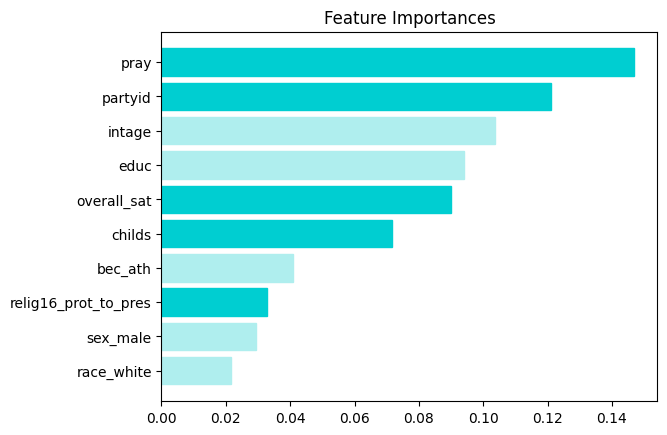

In [125]:
# graph of top 10 feature importances, lighter color indicates positive correlation
bars= plt.barh(feature_importance.index, feature_importance.importance)
for i, feat in enumerate(feature_importance.index):
  if feat in pos_neg['positive']:
    bars[i].set_color('paleturquoise')
  else:
    bars[i].set_color('darkturquoise')
plt.title('Feature Importances')
plt.show()

# Conclusion
Based on this classification model, the most important features that determines whether someone is likely to support legal abortion are how frequently they pray, which is a reasonable proxy for degree of religiosity, their party identification (more likely to support if they identify as a democrat), their age and education level, both positively correlated with level of support. <br/>
I would recommend Planned Parenthood to advertise in big urban cities, since they tend to lean towards being democratic. They could also advertise in college areas, as people living there are likely to be more highly educated,Moreover, rather than looking at the specific relgion a person follows, to look at how strict they are with their religious habits. <br/>
 If they were to have access to demographic data, they could also use this classification model to sort through large groups of people to select those who are likely to be interested in their services.

# Caveats
There are certain limitations to this classification model. For instance, having around 70% accuracy is far from perfect. Since it serves to guess politcal stance of people based on rather limited information about them, it is expected that the model would be unable to classify perfectly. Moreover, since I am working with self report data, there is inherent bias and error arisig from truthfulness of repsondents and misinterpretation of questions, leading to potentially misleading data. <br/>
There might also be aspects of opinions surrounding abortion that this model is not able to identify. Namely, the Rossi scale, which is the target variable of this model, mainly tackles question about the legality of abortion and does not include topics of morality. A person that supports the legalization of abortion might not necessarily support the act of it, and would still not be the target demographic for Planned Parenthood.
# Next Steps
Moving forward, I would look into expanding the feature space to include more attribute about each respondent, which could potentially lead to better model performace. Seeing as the model's fault mainly lies in identifying those who are against abortion, I would also try to gather more data about respondents with that sentiment such that more reliable patterns would be recognized by the algorithm. <br/>
I would also explore more aspects of the discussion surrouding abortion beyond its legality to gain more insight into public opinion regarding this issue, and build a model that can classify level of support in a more holistic way.